# 流网演示


## 流函数的可加性

假设水头 

$$
H(x,y)=H_1(x,y)+H_2(x,y)
$$

他们对应的流函数分别为 $\Psi,\Psi_1,\Psi_2$，满足

$$
\nabla H_1\cdot\nabla\Psi_1=0,\quad \nabla H_2\cdot\nabla\Psi_2=0
$$

记 $\Psi=\Psi_1+\Psi_2$，容易证明

$$
\nabla H\cdot\nabla\Psi=0
$$

# 地下水向井的运动

均值各向同性承压含水层，一完整井定流量$Q$抽水。

由 Thiem 公式

$$
h − h_w = s_w − s =\frac{Q}{2{\pi r}KM}\ln\frac{r}{r_w}
$$

由轴对称性

$$
\frac{\partial h}{\partial r}=\frac{Q}{2{\pi}KM}\frac{1}{r},\quad \frac{\partial h}{\partial \theta}=0
$$

知，

$$
v_x=-K\frac{\partial h}{\partial x}=-\frac{Q}{2\pi M}\frac{1}{r}\frac{x}{r}
$$

$$
v_y=-K\frac{\partial h}{\partial y}=-\frac{Q}{2\pi M}\frac{1}{r}\frac{y}{r}
$$

流函数

$$
\frac{\partial \Psi}{\partial x}=-v_y,\quad \frac{\partial \Psi}{\partial y}=v_x
$$

可以得出

$$
\frac{\partial \Psi}{\partial r}=0,\quad\frac{\partial \Psi}{\partial \theta}=-\frac{Q}{2\pi M}
$$

将流量按 $2\pi$ 做等分，可得流函数。

注意：教材中的定义与流体力学中的定义形式是一样的。研究渗流时，常定义 $\frac{\partial \Psi}{\partial x} = v_y$，$\frac{\partial \Psi}{\partial y} = -v_x$。按教材定义，流函数沿流向看向左增大。

流函数也可由速度场积分获得

$$
\varPsi =-\int_{x_0}^{x}v_y\mathrm{d}x + \int_{y_0}^{y}v_x \mathrm{d}y \\
$$

可以先计算流函数，再利用 `matplotlib.pyplot.contour` 作图，这种方法对技术要求高。`matplotlib.pyplot.streamplot` 提供了绘制流函数的功能，但是与我们的期望有差距。我们也可用 `matplotlib.pyplot.quiver` 在等水头线图上会出地下水的流向来分析流场。

## 示例：

$Q = 314.0m^3/d,\quad T = 100.0m^2/d,\quad M=10m,\quad s_w = 10.0m,\quad r_w = 0.05m, \quad h_w=-10m$

$$ h − h_w = s_w − s =\frac{Q}{2{\pi}T}\ln\frac{r}{r_w}$$


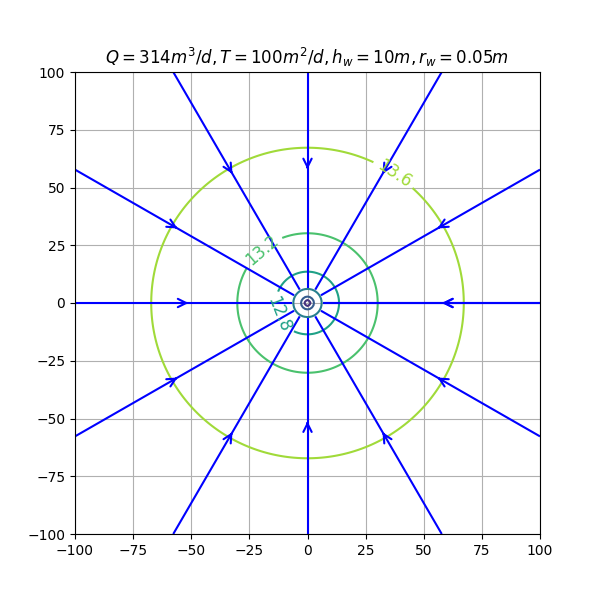

In [1]:
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np

# 控制小数的显示精度
np.set_printoptions(precision=4)

def drown_down(x, y, Q, T, rw, hw):
    h = np.NAN
    if np.abs(x**2 + y**2) > np.NZERO: 
        h = hw + Q*np.log((x**2+y**2)/rw**2)/4/np.pi/T
    return h
Vdrown_down = np.vectorize(drown_down)

def velocity(x, y, Q, M):
    U, V = np.NAN, np.NAN
    if np.abs(x**2 + y**2) > np.NZERO:  
        U = - Q*x/(x**2 + y**2)/2/np.pi/M
        V = - Q*y/(x**2 + y**2)/2/np.pi/M
    return (U, V)
Vvelocity = np.vectorize(velocity)

Q = 314.0
T = 100.0
M = 10.0
rw = 0.05
hw = 10.0

X, Y = np.meshgrid(np.linspace(-100, 100, 201), np.linspace(-100, 100, 201))
U, V = Vvelocity(X, Y, Q, M)

h = Vdrown_down(X, Y, Q, T, rw, hw)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-100, 100)
ax.set_ylim(-100, 100)
ax.grid(True)


CS = ax.contour(X, Y, h)
ax.clabel(CS, fontsize=12)

r = 20
theta = np.linspace(0,2*np.pi,13)
x = np.array([r*np.cos(t) for t in theta])
y = np.array([r*np.sin(t) for t in theta])
seed_points = np.array([x,y])

ax.streamplot(X, Y, U, V, color='b', arrowsize=1.5, arrowstyle='->', start_points=seed_points.T, broken_streamlines=False)
#ax.quiver(X, Y, U, V)

ax.set_title(r'$Q=314m^3/d, T=100m^2/d, h_w=10m, r_w=0.05m$')

plt.show()

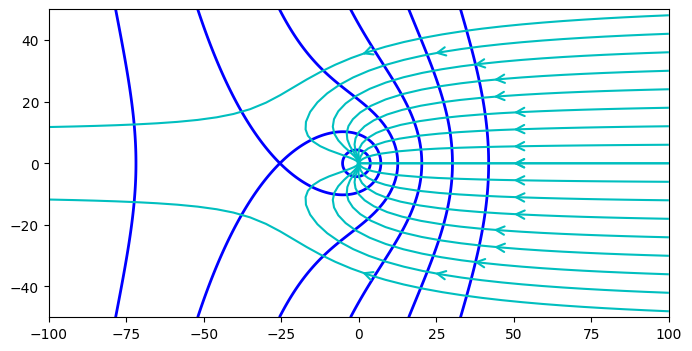

In [1]:
import numpy as np

import matplotlib.pyplot as plt

x,y=np.mgrid[-100:100:1000j,-50:50:1000j]

j0=0.0025
K=500
M=25
Q=2500

h=j0*x + np.log(x**2+y**2)*Q/K/M/np.pi/2

#create a matplotlib figure and adjust the width and heights
fig = plt.figure(figsize=(8,4)) 

# create the contours and streamplot
# 为了画出经过驻点的等值线，需要先算出驻点的水头值 h=0.14243
cs = plt.contour(x, y, h, [0.09243,0.14243,0.19243,0.24243,0.29243,0.34243], linewidths=2,  colors='b')

#plt.clabel(cs)
dy, dx = np.gradient(-h.T)

y0=np.arange(0.01, 50, 6)
x0=np.ones(y0.shape)*99
v0=np.array([x0,y0]).T
v1=np.array([x0,-y0]).T
plt.streamplot(x[:,0], y[0,:], dx, dy, color='c', arrowsize=1.5, arrowstyle='->', start_points=v0, broken_streamlines=False)
plt.streamplot(x[:,0], y[0,:], dx, dy, color='c', arrowsize=1.5, arrowstyle='->', start_points=v1, broken_streamlines=False)

#plt.savefig('mylogsig.png',dpi=400,bbox_inches='tight')
#fig.savefig('mylogsig.pdf', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show()